In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../pool_data_202211111622.csv')

In [3]:
df.head()

,pool_id,time_stamp,salinity,flow switch,flow meter,turbidity,ORP,PH,TDS,Pressure in tank,...,Shw msg,Drain,Human Counter,temperature,water level,cppm,phfeedtime,orpfeedtime,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,NaN,NaN,9.51440,774.049,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,NaN,NaN,9.35767,773.597,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,NaN,NaN,9.35767,773.869,7.41889,287.121,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,NaN,NaN,8.57397,773.959,7.41193,287.248,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,NaN,NaN,8.88745,773.597,7.41699,287.157,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'flow switch', 'flow meter',
       'turbidity', 'ORP', 'PH', 'TDS', 'Pressure in tank', 'Pressure in',
       'Pressure out', 'Pump RPM', 'pump current', 'dis_feeder', 'ph_feeder',
       'Fresh water', 'Shw msg', 'Drain', 'Human Counter', 'temperature',
       'water level', 'cppm', 'phfeedtime', 'orpfeedtime',
       'bather in from mens', 'bather in from ladies'],
      dtype='object')

We want to remove some the columns we know aren't necessary.

The following columns are deprecated from the client:
- `flow switch`
- `flow meter`
- `Pressure in tank`
- `Shw msg`
- `phfeedtime`
- `orpfeedtime`

In [5]:
deprecated_col = ['flow switch', 'flow meter', 'Pressure in tank', 'Shw msg', 'phfeedtime', 'orpfeedtime']

df = df.drop(deprecated_col, axis=1)
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,Pump RPM,...,dis_feeder,ph_feeder,Fresh water,Drain,Human Counter,temperature,water level,cppm,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN


Lets tidy up our data. `cppm` is calculated from ORP and thus is not necessary. We also do not have data for `bather in from mens` and `bather in from ladies`. We will remove these as well then look at missing values.

In [6]:
unnecessary_data = ['cppm', 'bather in from mens', 'bather in from ladies']

df = df.drop(unnecessary_data, axis=1)
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'turbidity', 'ORP', 'PH', 'TDS',
       'Pressure in', 'Pressure out', 'Pump RPM', 'pump current', 'dis_feeder',
       'ph_feeder', 'Fresh water', 'Drain', 'Human Counter', 'temperature',
       'water level'],
      dtype='object')

In [7]:
df.isna().sum()

pool_id              0
time_stamp           0
salinity            31
turbidity           31
ORP                  0
PH                   0
TDS                 31
Pressure in         31
Pressure out        31
Pump RPM         43635
pump current        31
dis_feeder       43635
ph_feeder        43635
Fresh water         31
Drain               31
Human Counter       31
temperature          0
water level         31
dtype: int64

In [8]:
len(df)

43635

Comparing our missing data and the len of the dataframe, we see that the columns `Pump RPM`, `dis_feeder`, and `ph_feeder` are completely empty. We will drop those columns.

In [9]:
empty_col = ['Pump RPM', 'dis_feeder', 'ph_feeder']

df = df.drop(empty_col, axis=1)
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'turbidity', 'ORP', 'PH', 'TDS',
       'Pressure in', 'Pressure out', 'pump current', 'Fresh water', 'Drain',
       'Human Counter', 'temperature', 'water level'],
      dtype='object')

In [10]:
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
0,10001,2022-11-01 11:01:16.220 -0400,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,0.0,0.0,74.2574,500.0
1,10001,2022-11-01 11:01:26.323 -0400,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
2,10001,2022-11-01 11:01:36.386 -0400,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
3,10001,2022-11-01 11:01:46.498 -0400,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
4,10001,2022-11-01 11:01:56.554 -0400,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0


In [11]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], utc=True) #Convert to timestamp dtype through UTC
df['time_stamp'] = df['time_stamp'].dt.tz_convert('Canada/Eastern') #Convert back to Canadian Eastern time
df['time_stamp'] = df['time_stamp'].dt.tz_localize(None) #Remove localization information

In [12]:
df['time_stamp'] 

0       2022-11-01 11:01:16.220
1       2022-11-01 11:01:26.323
2       2022-11-01 11:01:36.386
3       2022-11-01 11:01:46.498
4       2022-11-01 11:01:56.554
                  ...          
43630   2022-11-01 11:00:26.794
43631   2022-11-01 11:00:36.852
43632   2022-11-01 11:00:46.971
43633   2022-11-01 11:00:56.031
43634   2022-11-01 11:01:06.155
Name: time_stamp, Length: 43635, dtype: datetime64[ns]

In [13]:
df = df.sort_values(by='time_stamp')
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
39668,10001,2022-11-01 00:00:06.605,285.584,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,0.0,0.0,74.2574,500.0
39669,10001,2022-11-01 00:00:16.661,285.638,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,0.0,0.0,74.2574,500.0
39670,10001,2022-11-01 00:00:26.768,285.855,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39671,10001,2022-11-01 00:00:36.834,285.855,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39672,10001,2022-11-01 00:00:46.936,285.765,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,0.0,0.0,74.2574,500.0


Today, we're going to focus on creating an alert each time our pH is out of scope. Oour ideal range is 7.2-7.8 pH with a target of 7.6. Lets start by plotting out our pH and seeing where it stands.

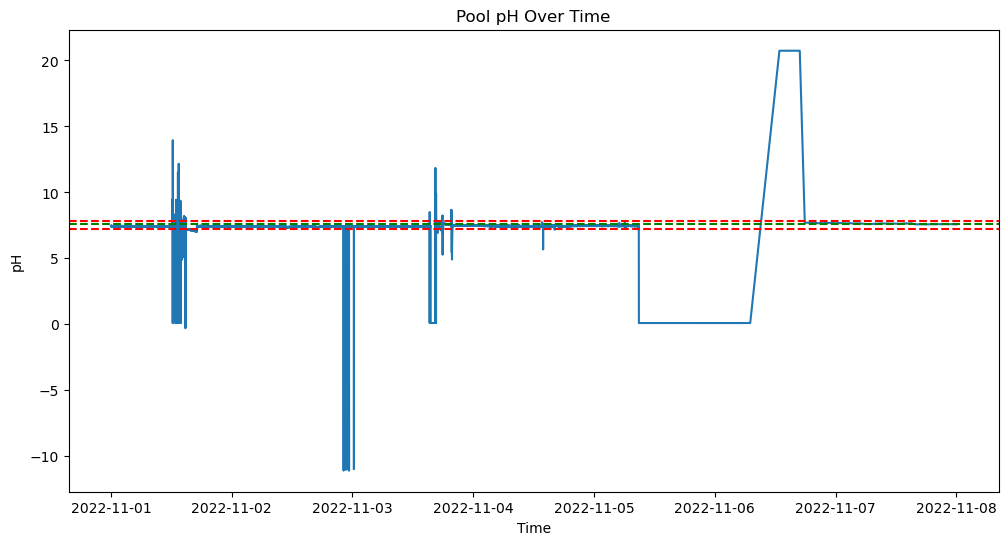

In [14]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df['time_stamp'], df['PH'])
ax.set_xlabel('Time')
ax.set_ylabel('pH')
ax.set_title('Pool pH Over Time')
ax.axhline(y=7.2, linestyle='--',color='red')
ax.axhline(y=7.8, linestyle='--',color='red')
ax.axhline(y=7.6, linestyle='--',color='green')

In [28]:
time = pd.to_datetime('2022-11-07 21:59:24')
previous_time = str(time-pd.Timedelta("2 minutes"))
str_time = str(time)

print(previous_time, str_time)

2022-11-07 21:57:24 2022-11-07 21:59:24


In [64]:
df = df.reset_index()

In [53]:
time = '2022-11-07 21:59:24'
time = pd.to_datetime(time)
previous_time = time-pd.Timedelta(hours=2)
str_time = str(time)
str_previous_time = str(previous_time)

In [73]:
index = df.index[df['time_stamp'] == '2022-11-07 21:59:24.885'].tolist()
print(index)

[43630]


                   time_stamp  pool_id  salinity  turbidity      ORP       PH  \
43625 2022-11-07 18:58:34.849    10001   288.134    32.9949  722.599  7.58726   
43626 2022-11-07 19:58:44.834    10001   287.392    32.6814  721.424  7.58599   
43627 2022-11-07 19:58:54.891    10001   287.465    32.8381  721.333  7.58662   
43628 2022-11-07 20:59:04.835    10001   286.723    32.0544  718.530  7.59359   
43629 2022-11-07 20:59:14.896    10001   286.741    31.7410  718.620  7.58346   
43630 2022-11-07 21:59:24.885    10001   286.054    31.2708  719.615  7.60182   

           TDS  Pressure in  Pressure out  pump current  Fresh water  Drain  \
43625  288.134      2.51555       2.51447           0.0          0.0    0.0   
43626  287.392      2.51591       2.51483           0.0          0.0    0.0   
43627  287.465      2.51591       2.51411           0.0          0.0    0.0   
43628  286.723      2.51628       2.51393           0.0          0.0    0.0   
43629  286.741      2.51573       2.5

<AxesSubplot:>

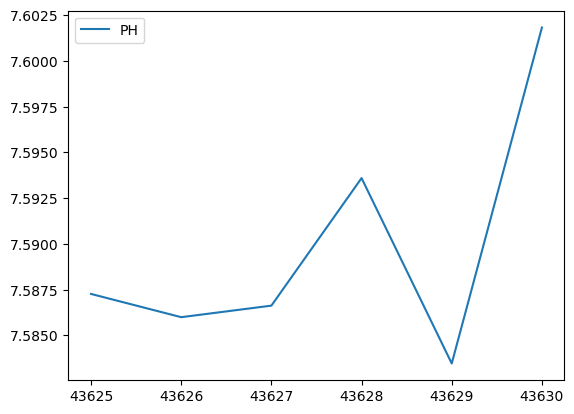

In [74]:
df_time = df.iloc[index[0]-5:index[0]+1] # avoid end of index issues
#print(df.loc(str_time))
print(df_time)
df_time.plot(y='PH', use_index=True)

In [95]:
time = pd.to_datetime('2022-11-07 21:59:24')
previous_time = str(time-pd.Timedelta("24 hours"))
str_time = str(time)

#print(previous_time, str_time)
df[previous_time:str_time].head()

,pool_id,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
time_stamp,,,,,,,,,,,,,,
2022-11-06 22:53:44.041,10001,278.440,33.7786,744.572,7.68537,278.440,2.51537,2.51465,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-06 22:53:54.102,10001,278.404,33.4651,744.391,7.69170,278.404,2.51555,2.51393,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-06 23:53:54.910,10001,279.562,32.8381,742.763,7.66131,279.562,2.51555,2.51447,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-07 00:53:54.933,10001,280.086,33.4651,739.418,7.67651,280.086,2.51555,2.51411,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-07 01:54:04.879,10001,280.556,32.6814,737.338,7.65372,280.556,2.51519,2.51411,0.0,0.0,0.0,0.0,74.2574,500.0


In [107]:
df_out = df[(df['PH'] < 7.2) | (df['PH'] > 7.8)]
len(df_out)/len(df)

0.18081815056720524

In [123]:
ph_superlow = df[(df['PH'] <= 6)]
print(ph_superlow)

                         pool_id  salinity  turbidity      ORP        PH  \
time_stamp                                                                 
2022-11-01 12:15:56.548    10001   288.929    7.47681  762.295  0.097475   
2022-11-01 12:16:06.664    10001   289.363    7.00635  755.422  0.096210   
2022-11-01 12:16:16.726    10001   289.490    7.32007  752.981  0.096210   
2022-11-01 12:16:26.828    10001   289.635    7.47681  744.210  0.096842   
2022-11-01 12:16:36.890    10001   290.213    7.79028  743.035  0.096842   
...                          ...       ...        ...      ...       ...   
2022-11-06 05:01:22.536    10001   279.724   36.28660  662.649  0.096842   
2022-11-06 05:01:32.600    10001   279.616   36.91360  663.644  0.097475   
2022-11-06 06:01:42.629    10001   279.996   36.28660  660.931  0.097475   
2022-11-06 06:01:52.689    10001   279.960   36.28660  660.660  0.096842   
2022-11-06 07:01:52.943    10001   280.086   35.18950  663.824  0.096210   

           

In [122]:
def ph_warning(time, data, pool_id):
    df = data
    df.sort_values(by='time_stamp')
    
    try:
        df.set_index('time_stamp', inplace=True)
    except KeyError:
        pass
    
    pool = df[df['pool_id'] == pool_id]
    ph = pool.loc[time]['PH']
    print(ph)
    print(f'pH for pool {pool_id} is currently {ph}')
    
    if ph >= 7.8:
        print('pH too basic, take immediate action')
    elif ph <= 7.2:
        print('pH too acidic, take immediate action')
    elif ph < 7.5:
        print('pH becoming acidic, consider taking action')
    elif ph > 7.65:
        print('pH becoming basic, consider taking action')
    else:
        print('pH is okay')
        
    ph_minutes(time, pool)
    ph_summary(time, pool)
    
    
def ph_minutes(time, data):
    df = data.reset_index()
    index = df.index[df['time_stamp'] == time].tolist()
    
    # Have to take the last 5 time steps because collection frequency varies
    df_time = df.iloc[index[0]-5:index[0]+1] # avoid end of index issues
    # print(df_time)
    df_time.plot(x='time_stamp', y='PH', use_index=True)
    

def ph_summary(time, data):
    df = data
    time = pd.to_datetime(time)
    time_diff = time-pd.Timedelta("24 hours")

    df_summary = df.loc[str(time_diff): str(time)]

    #print(df_summary)
    df_summary.plot(y='PH', use_index=True)
    
    # PH stats
    max_ph = max(df_summary['PH'])
    min_ph = min(df_summary['PH'])
    avg_ph = df_summary['PH'].mean()
    
    # Out of range calculation
    df_out = df_summary[(df_summary['PH'] < 7.2) | (df_summary['PH'] > 7.8)]
    out_perc = round((len(df_out)/len(df_summary)) * 100,2)

    print(f"""
            In the last 24 hours from {time_diff.floor('S')} to {time.floor('S')} we have the following information:\n
            Max pH: {max_ph} \n 
            Min pH: {min_ph} \n
            Average pH: {avg_ph} \n
            Out of Range Time (%): {out_perc}%
            """)

7.60182
pH for pool 10001 is currently 7.60182
pH is okay

            In the last 24 hours from 2022-11-06 21:59:24 to 2022-11-07 21:59:24 we have the following information:

            Max pH: 7.6917 
 
            Min pH: 7.5689 

            Average pH: 7.622154210526315 

            Out of Range Time (%): 0.0%
            


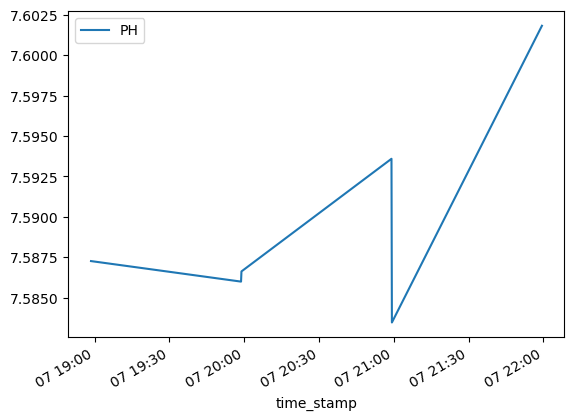

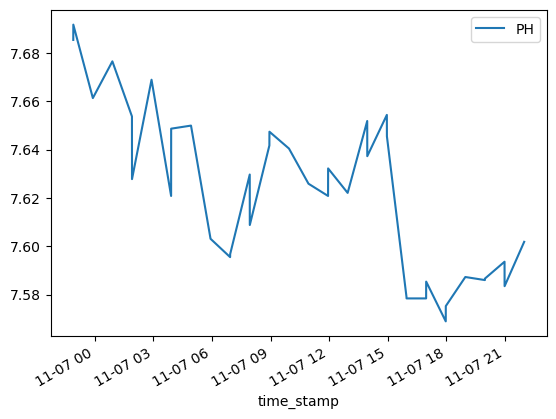

In [121]:
pool_id = 10001

ph_warning('2022-11-07 21:59:24.885', df, pool_id)